In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Ranking based metric

1. Rank metrics are more concerned with evaluating classifiers based on how effective they are at separating classes
2. These metrics require that a classifier predicts a score or a probability of class membership.
3. From this score, different thresholds can be applied to test the effectiveness of classifiers. Those models that maintain a good score across a range of thresholds will have good class separation and will be ranked higher.

## Getting the data

https://archive.ics.uci.edu/ml/datasets/SPECTF+Heart

In [2]:
data_train = np.loadtxt('SPECTF.train',delimiter=',')
data_test = np.loadtxt('SPECTF.test',delimiter=',')

In [3]:
X_train = data_train[:,1:]
y_train = data_train[:,0]
X_test = data_test[:,1:]
y_test = data_test[:,0]

In [4]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(80, 44) (80,)
(187, 44) (187,)


In [5]:
y_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Using Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
clf = LogisticRegression(random_state=0,solver='newton-cg',penalty = 'l2',max_iter=10000)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=0, solver='newton-cg')

In [8]:
pred = clf.predict(X_test)
pred

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0.])

In [9]:
accuracy_score(y_test,pred)

0.7219251336898396

In [10]:
prob = clf.predict_proba(X_test)
prob

array([[9.99366841e-01, 6.33158718e-04],
       [6.36840122e-01, 3.63159878e-01],
       [1.10643067e-08, 9.99999989e-01],
       [2.82567202e-02, 9.71743280e-01],
       [2.99464648e-03, 9.97005354e-01],
       [6.69599437e-03, 9.93304006e-01],
       [3.21453975e-11, 1.00000000e+00],
       [7.14268081e-05, 9.99928573e-01],
       [0.00000000e+00, 1.00000000e+00],
       [6.48469731e-03, 9.93515303e-01],
       [4.88924804e-06, 9.99995111e-01],
       [0.00000000e+00, 1.00000000e+00],
       [1.50220202e-04, 9.99849780e-01],
       [0.00000000e+00, 1.00000000e+00],
       [9.99954719e-01, 4.52809458e-05],
       [0.00000000e+00, 1.00000000e+00],
       [9.53447359e-01, 4.65526410e-02],
       [3.98486344e-08, 9.99999960e-01],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [8.01203548e-12, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.57207580e-13, 1.00000000e+00],
       [1.24942234e-09, 9.99999999e-01],
       [7.762728

In [11]:
confusion_matrix(y_test,pred)

array([[  7,   8],
       [ 44, 128]])

In [12]:
for i in set(y_test):
    print (i, sum(y_test== i))

0.0 15
1.0 172


In [13]:
conf = confusion_matrix(y_test,pred)
print(conf[1,1]/(conf[1,0] + conf[1,1]))

0.7441860465116279


In [14]:
from sklearn.metrics import recall_score
recall_score(y_test,pred)

0.7441860465116279

## ROC curve

<img src = "Picture1.png" width = 400>

ROC curves are used to analyze the capability of binary classifiers to discriminate between classes. 

It depends on 2 quantities:

1. True Positive rate (TPR) or Sensitivity
$$TPR = \frac{TP}{TP + FN}$$

2. False Positive rate (FPR) or 1 - Specificity
$$FPR = \frac{FP}{FP + TN}$$

Points to note:
1. Remember, in logistic Regression we used a threshold of 0.5. Any sample for which sigmoid predicted a value > 0.5, we predicted the class as 1 and otherwise 0
2. However, just looking at the class separation metrics (sensitivity/specificity etc) at a threshold of 0.5 might be very restrictive.
3. So we will vary the threshold from 0 to 1 and analyze sensitivity and specificity for all cases.
4. For a good model

In [15]:
## Each loop iteration gives the threshold value
prob1 = prob[:,1]
temp = []
for i in np.linspace(0,1,500):
    pred1 = prob1.copy()
    ## making the prediction using the threshold
    pred1[prob1>=i] = 1
    pred1[prob1<i] = 0
    ## Computing sensitivity and specificity
    confusion = confusion_matrix(y_test,pred1)
    sensi = confusion[1,1]/(confusion[1,0] + confusion[1,1])
    speci_1 = 1 - confusion[0,0]/(confusion[0,0] + confusion[0,1])
    temp.append([speci_1,sensi])
    
curve = np.array(temp)

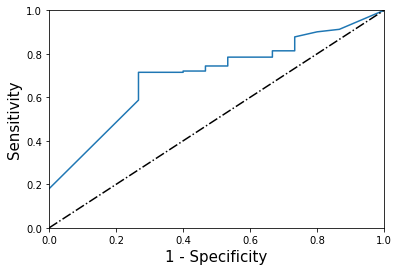

In [16]:
plt.plot(curve[:,0],curve[:,1])
plt.plot([0,1],[0,1],color = 'k',linestyle = '-.')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('1 - Specificity',size = 15)
plt.ylabel('Sensitivity',size = 15)
plt.show()


## Think about

1. What is the max area of this curve
2. Is a larger area good or a smaller area good ?
3. Will a larger area model ranked above a smaller area model ? Or vice versa
3. How can this curve achieve the max area ?